# This script to show how the Active Learning scan can capture the edges

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
# from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model,Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout
import os
from tqdm import tqdm
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier,RandomForestClassifier
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import warnings
import sys
mirrored_strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0", "/gpu:1"])
## check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found.....')
    #sys.exit()
else:
    print('Default GPU device :{}'.format(tf.test.gpu_device_name()))
    
################

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')


<ipython-input-1-797ce0b76ce5>:20: UserWarning: No GPU found.....
  warnings.warn('No GPU found.....')


In [45]:
def obs(x1,x2):
    #F = (2+np.cos(x1)*np.cos(x2))**5
    F = (3*x1)**2+x2**2+7
    return np.array(F)  
def generate_init(n):
    x1,x2=[],[]
    for q in range(n):
        x1.append(np.random.uniform(-10,10))
        x2.append(np.random.uniform(-10,10))
    return np.array(x1),np.array(x2),np.array([x1,x2]).T


def orcal(x1,x2):
    #F = (2+np.cos(x1)*np.cos(x2))**5
    F = (3*x1)**2+x2**2+7
    for q,item in enumerate(F):
      if ( item < 55 ):
        F[q] = 1
      else:
        F[q] =0   
    return np.array(F)  

score = lambda x : np.array([q*(1-q) for q in x])

Progress: 100%|##########| 200/200 [01:06<00:00,  3.02it/s]


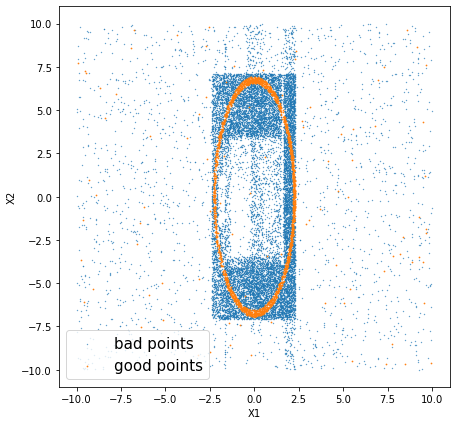

In [44]:
def run_AL(runs =20,learning_rate=0.01,n_estimators=100,max_depth=30,print_output=True):
    BDT =GradientBoostingClassifier(learning_rate=learning_rate,n_estimators=n_estimators,max_depth=max_depth)
    x1,x2,X=generate_init(100)
    obs1 = orcal(x1, x2)
    BDT.fit(X, obs1)         
    badP1,badP2 =[],[]
    for q in tqdm(range(runs),ascii=True,desc='Progress'): 
      X1,X24,x = generate_init(1000)
      pred = BDT.predict(x).flatten()
      x_new = x[pred==1][:90]
      q = np.argsort(score(pred))[::-1]
      q_new = x[q[:10]]
      x_new = np.append(x_new,q_new[:10],axis=0)
      ob = orcal(x_new[:,0], x_new[:,1])
      Y = ob == 1
      badP1.append(x_new[ob!=1][:,0])  
      badP2.append(x_new[ob!=1][:,1])
      X= np.append(X,x_new[Y],axis=0)
      obs1=np.append(obs1,ob[Y],axis=0)
      BDT.fit(X, obs1) 
    return X,badP1,badP2
Flatten = lambda x : [item for i in x for item in i]    
XL,dd1,dd2 = run_AL(runs=200)
plt.figure(figsize=(7,7))
plt.scatter(Flatten(dd1),Flatten(dd2),s=0.1,label = 'bad points')
plt.scatter(XL[:,0],XL[:,1],s=0.5,label='good points');

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(fontsize=15)
#plt.title('Active Learning- Sampled batch (points= {:0.0f})'.format(len(XL)))
plt.show()

# different condition for the good points

Progress: 100%|##########| 50/50 [00:17<00:00,  2.79it/s]


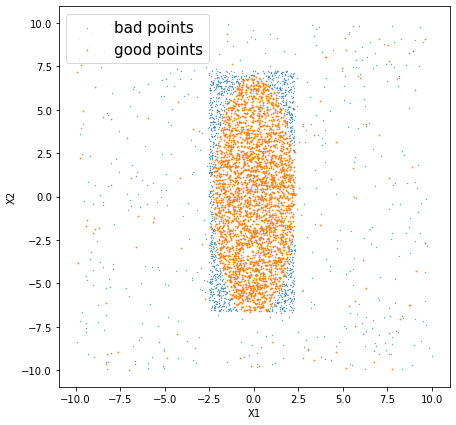

In [47]:
def run_AL(runs =20,learning_rate=0.01,n_estimators=100,max_depth=30,print_output=True):
    BDT =GradientBoostingClassifier(learning_rate=learning_rate,n_estimators=n_estimators,max_depth=max_depth)
    x1,x2,X=generate_init(100)
    obs1 = orcal(x1, x2)
    BDT.fit(X, obs1)         
    badP1,badP2 =[],[]
    for q in tqdm(range(runs),ascii=True,desc='Progress'): 
      X1,X24,x = generate_init(1000)
      pred = BDT.predict(x).flatten()
      x_new = x[pred==1][:90]
      q = np.argsort(score(pred))[::-1]
      q_new = x[q[:10]]
      x_new = np.append(x_new,q_new[:10],axis=0)
      ob = orcal(x_new[:,0], x_new[:,1])
      Y = ob == 1
      badP1.append(x_new[ob!=1][:,0])  
      badP2.append(x_new[ob!=1][:,1])
      X= np.append(X,x_new[Y],axis=0)
      obs1=np.append(obs1,ob[Y],axis=0)
      BDT.fit(X, obs1) 
    return X,badP1,badP2
Flatten = lambda x : [item for i in x for item in i]    
XL,dd1,dd2 = run_AL(runs=50)
plt.figure(figsize=(7,7))
plt.scatter(Flatten(dd1),Flatten(dd2),s=0.1,label = 'bad points')
plt.scatter(XL[:,0],XL[:,1],s=0.5,label='good points');

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(fontsize=15)
#plt.title('Active Learning- Sampled batch (points= {:0.0f})'.format(len(XL)))
plt.show()